In [9]:
import pandas as pd
data=pd.read_csv('Cell_stats_sim_1.csv',header=None)
data.columns = ['time', 'time_of_day','cell_id','cell_energy_pool','krat_pop','krat_energy','snake_pop','snake_energy']

In [209]:
#cell_id = str((0,0))
cells = data['cell_id'].unique()
len(cells)
data.iloc[2950:].head()

,time,time_of_day,cell_id,cell_energy_pool,krat_pop,krat_energy,snake_pop,snake_energy
2950,84,12,"(7, 10)",1494,0,0.0,0,0.0
2951,84,12,"(7, 11)",1490,0,0.0,0,0.0
2952,84,12,"(7, 12)",1490,0,0.0,1,242.0
2953,84,12,"(7, 13)",1475,1,58.0,0,0.0
2954,84,12,"(7, 14)",1482,1,57.0,0,0.0


In [10]:
data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
avg_cell_energy = data_initial_time['cell_energy_pool'].sum()/len(data_initial_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(initial_time,avg_cell_energy,initial_krat_pop,initial_snake_pop)
cells = data['cell_id'].unique()
print('Number Of Cells: {}'.format(len(cells)))
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
avg_cell_energy = data_final_time['cell_energy_pool'].sum()/len(data_final_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(final_time,avg_cell_energy,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Number Of Cells: 2500
Initial Stats
time: 0, Avg Cell Energy 1500.0, Krats 100, Snakes 15
Final Stats
time: 8748, Avg Cell Energy 1320.3812, Krats 444, Snakes 0


93.0


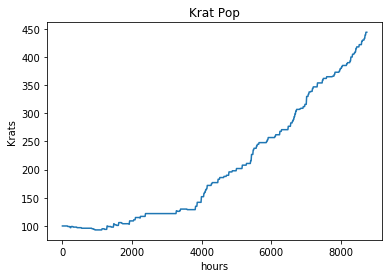

In [11]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

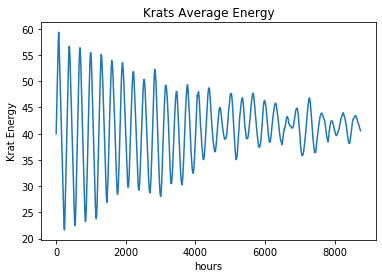

In [12]:
df = pd.DataFrame(data[["time","krat_pop", "krat_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_energy'] = df['krat_energy']/df['krat_pop']
ytemp = list(df['average_krat_energy'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat Energy")
plt.title("Krats Average Energy")

plt.show()

0.0


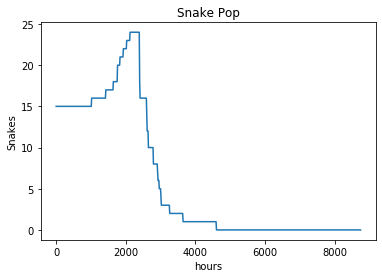

In [13]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "snake_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snakes")
plt.title("Snake Pop")

plt.show()

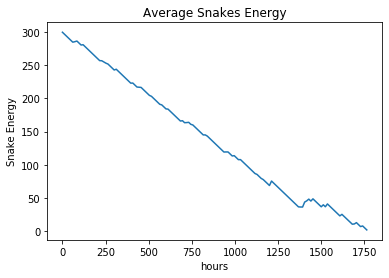

In [6]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
ytemp = list(df['average_snake_energy'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake Energy")
plt.title("Average Snakes Energy")

plt.show()

In [156]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
df.head()

,time,snake_pop,snake_energy,average_snake_energy
0,0,15,3000.0,200.000000
1,12,15,3077.0,205.133333
2,24,15,3447.0,229.800000
3,36,15,3651.0,243.400000
4,48,15,3833.0,255.533333


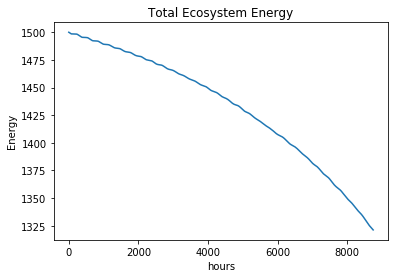

In [7]:
df = data[["time", "cell_energy_pool"]].groupby("time").sum()
cells = data['cell_id'].unique()

ytemp = list(df.stack())
#if (y/80)>2140
y = [y/len(cells) for y in ytemp ]
xtemp= list(df.index)
x = xtemp[0:len(y)]


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Energy")
plt.title("Total Ecosystem Energy")

plt.show()

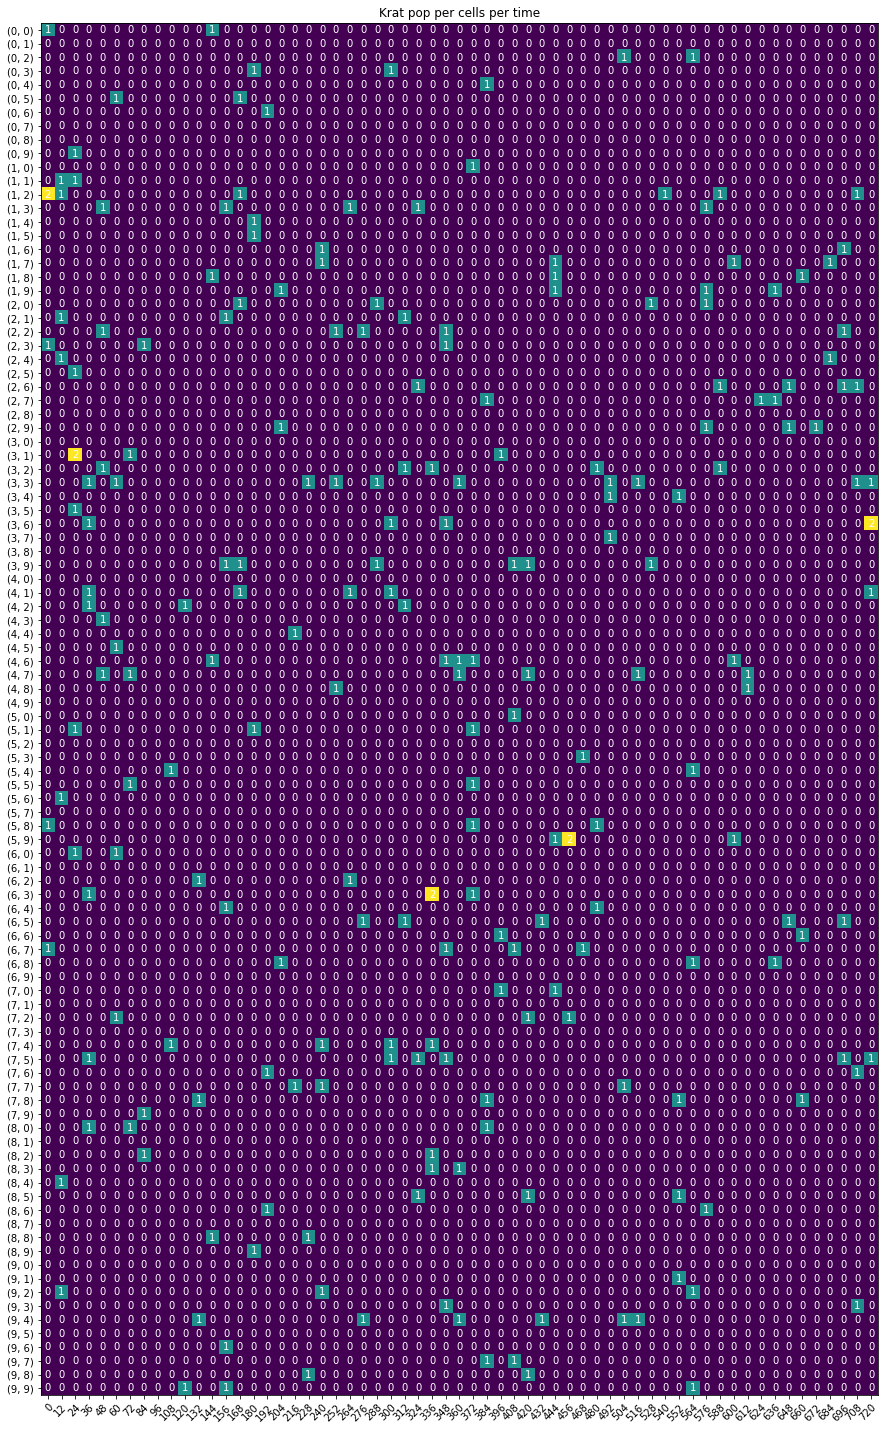

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]

def cell_id_analysis(width,length):
    cell_ids = []
    for x in range(width+1):
        for y in range(length+1):
            cell_id = (x,y)
            cell_ids.append(cell_id)
    return cell_ids

cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

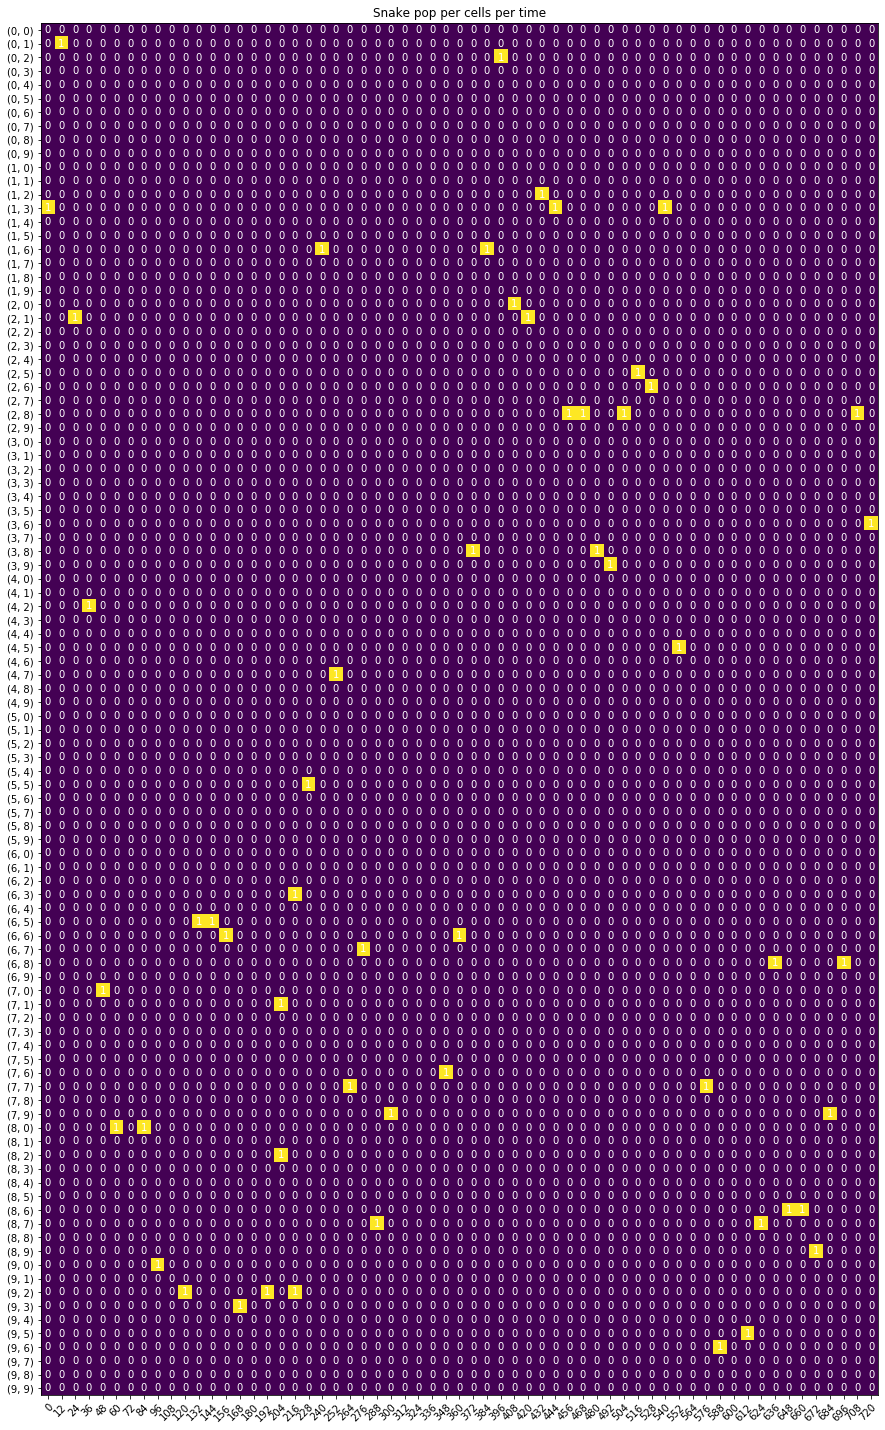

In [238]:

df = data[['time','cell_id','snake_pop']]
cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()

In [159]:
def hour_tick(time_of_day):
    if time_of_day >= 18:
        time_of_day = 0
    else:
        time_of_day += 6
    return time_of_day

end_time = 365*4
time_of_day = 0
for i in range(0,end_time,6):
    print('global time: {}, time of day: {}'.format(i,time_of_day))
    time_of_day = hour_tick(time_of_day)

global time: 0, time of day: 0
global time: 6, time of day: 6
global time: 12, time of day: 12
global time: 18, time of day: 18
global time: 24, time of day: 0
global time: 30, time of day: 6
global time: 36, time of day: 12
global time: 42, time of day: 18
global time: 48, time of day: 0
global time: 54, time of day: 6
global time: 60, time of day: 12
global time: 66, time of day: 18
global time: 72, time of day: 0
global time: 78, time of day: 6
global time: 84, time of day: 12
global time: 90, time of day: 18
global time: 96, time of day: 0
global time: 102, time of day: 6
global time: 108, time of day: 12
global time: 114, time of day: 18
global time: 120, time of day: 0
global time: 126, time of day: 6
global time: 132, time of day: 12
global time: 138, time of day: 18
global time: 144, time of day: 0
global time: 150, time of day: 6
global time: 156, time of day: 12
global time: 162, time of day: 18
global time: 168, time of day: 0
global time: 174, time of day: 6
global time: 18

In [51]:
move_range = 2
for x in range(-move_range,move_range+1):
    print(x)

-2
-1
0
1
2
